In [1]:
import numpy as np
import pandas as pd
import warnings
import model_search

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

warnings.filterwarnings(action="ignore")

c:\Users\kiril\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загрузка данных
df = pd.read_csv('../data/synth_ds_0.csv')
full_df = pd.read_csv('../data/f_opt/ds0/synth_full_ds_0.csv').sort_values('x1')
columns = [*df]

# Преобразование в массивы
x_train = np.array(df[columns[:-1]].values.tolist())
x_full = np.array(full_df[columns[:-1]].values.tolist())
y_train = np.array(df[columns[-1]].values.tolist()).reshape([-1, 1])
y_full = np.array(full_df[columns[-1]].values.tolist()).reshape([-1, 1])

# Нормализация
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_full_scaled = scaler.transform(x_full)

In [ ]:
# Классы моделей
model_classes = ['ANN', 'HistGradientBoostingRegressor', 'XGBRegressor', 'KNeighborsRegressor',
                'SVR', 'GaussianProcessRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'ElasticNet', 'BayesianRidge']

# Гиперпараметрический поиск и оценка моделей
OS = model_search.OptunaSearchCV(model_classes, compare_kfold=False)
OS.fit(x_train_scaled, y_train, x_full_scaled, y_full, ['8'], n_trials=30, n_startup_trials=10)


ANN hyperoptimization
8 cross-validation


Best trial: 16. Best value: 0.666027: 100%|██████████| 30/30 [01:25<00:00,  2.84s/it] 



HistGradientBoostingRegressor hyperoptimization
8 cross-validation


Best trial: 14. Best value: 0.699961: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]



XGBRegressor hyperoptimization
8 cross-validation


Best trial: 22. Best value: 0.680744: 100%|██████████| 30/30 [00:01<00:00, 15.85it/s]



KNeighborsRegressor hyperoptimization
8 cross-validation


Best trial: 22. Best value: 0.268463: 100%|██████████| 30/30 [00:01<00:00, 25.62it/s]



SVR hyperoptimization
8 cross-validation


Best trial: 17. Best value: 0.315227: 100%|██████████| 30/30 [00:01<00:00, 26.69it/s]



KernelRidge hyperoptimization
8 cross-validation


Best trial: 13. Best value: 0.37419: 100%|██████████| 30/30 [00:00<00:00, 38.95it/s]  



GradientBoostingRegressor hyperoptimization
8 cross-validation


Best trial: 21. Best value: 0.652948: 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]



ExtraTreesRegressor hyperoptimization
8 cross-validation


Best trial: 21. Best value: 0.572826: 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]



GaussianProcessRegressor hyperoptimization
8 cross-validation


Best trial: 12. Best value: 0.225185: 100%|██████████| 30/30 [00:00<00:00, 33.26it/s]



RandomForestRegressor hyperoptimization
8 cross-validation


Best trial: 23. Best value: 0.615984: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s] 



CatBoostRegressor hyperoptimization
8 cross-validation


Best trial: 7. Best value: 0.695066: 100%|██████████| 30/30 [00:09<00:00,  3.25it/s]



Ridge hyperoptimization
8 cross-validation


Best trial: 13. Best value: -0.0513957: 100%|██████████| 30/30 [00:00<00:00, 65.67it/s]



ElasticNet hyperoptimization
8 cross-validation


Best trial: 15. Best value: -0.0230146: 100%|██████████| 30/30 [00:00<00:00, 55.73it/s]



LinearRegression hyperoptimization
8 cross-validation


Best trial: 0. Best value: -0.0600291: 100%|██████████| 30/30 [00:00<00:00, 72.57it/s]



SGDRegressor hyperoptimization
8 cross-validation


Best trial: 13. Best value: -0.0040759: 100%|██████████| 30/30 [00:00<00:00, 54.80it/s]



Lasso hyperoptimization
8 cross-validation


Best trial: 0. Best value: -0.0198233: 100%|██████████| 30/30 [00:00<00:00, 59.76it/s]



LassoLars hyperoptimization
8 cross-validation


Best trial: 23. Best value: -0.0222392: 100%|██████████| 30/30 [00:00<00:00, 58.95it/s]



ARDRegression hyperoptimization
8 cross-validation


Best trial: 10. Best value: -0.0152143: 100%|██████████| 30/30 [00:00<00:00, 53.47it/s]



BayesianRidge hyperoptimization
8 cross-validation


Best trial: 22. Best value: -0.0461227: 100%|██████████| 30/30 [00:00<00:00, 54.42it/s]


In [ ]:
# Записать результаты в csv
OS.results_df.to_csv('../results/synth_results1.csv')

In [ ]:
# Построить график изначальной функции
plt.grid()
plt.plot(x_full.T[0], y_full)
plt.scatter(x_train.T[0], y_train, color='darkorange')
plt.xlabel('x1')
plt.ylabel('y')
plt.savefig("synth_ds_0")

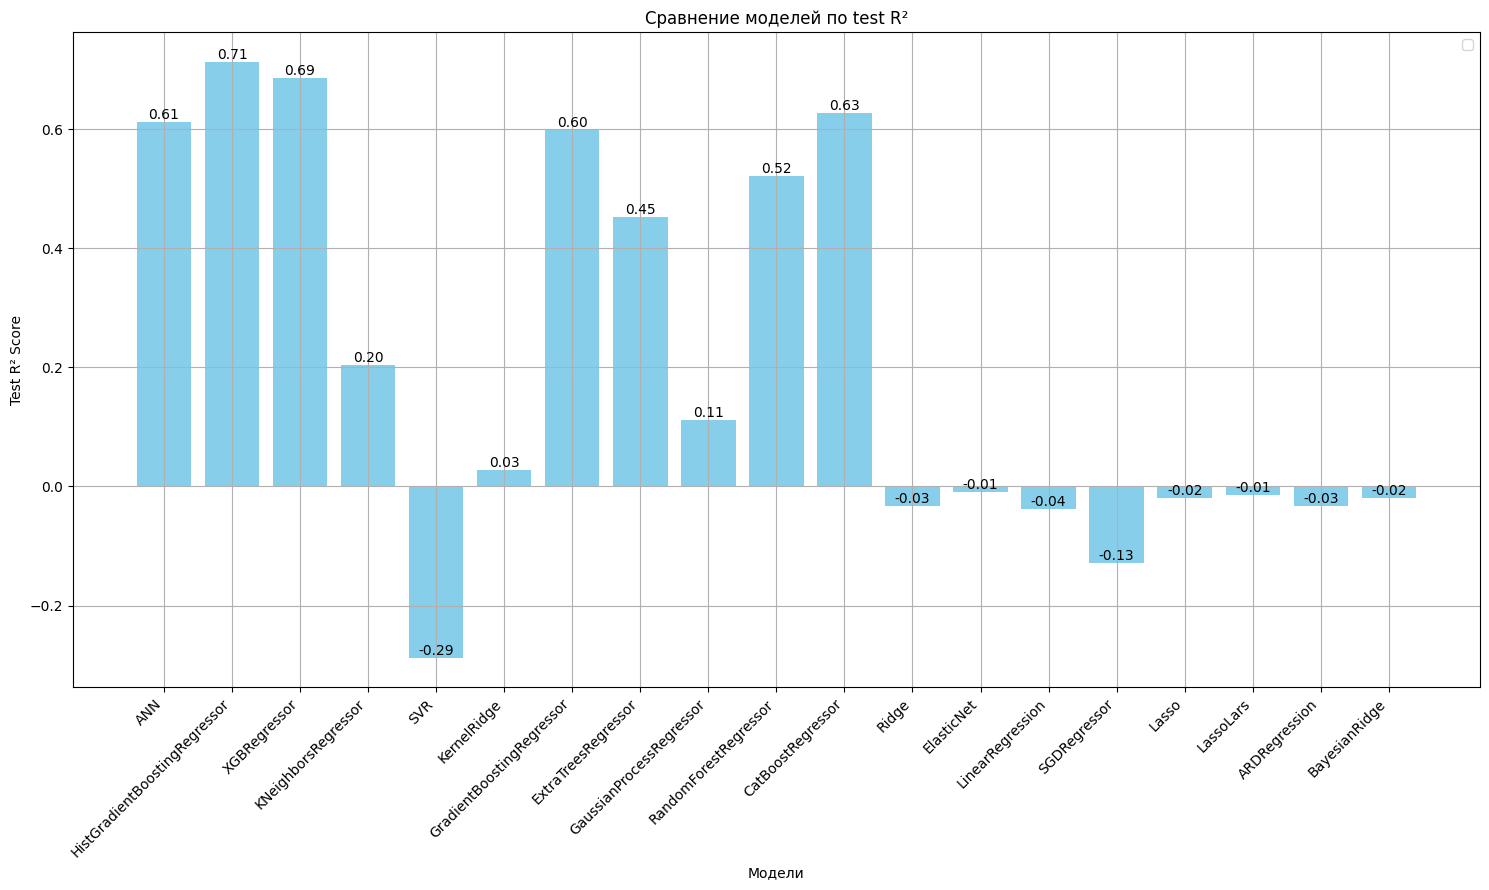

In [4]:
# Построить график тестовой оценки R2 для лучших моделей
model_names = [f'{type(model).__name__}'for model in OS.best_models]
model_names[0] = 'ANN'
test_r2_scores = OS.best_models_r_test
val_r2_scores = OS.best_models_r_val

plt.figure(figsize=(15, 9))

plt.grid()
tbars = plt.bar(model_names, test_r2_scores, color='skyblue')
plt.title('Сравнение моделей по test R²')
plt.xlabel('Модели')
plt.ylabel('Test R² Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
for tbar, tscore in zip(tbars, test_r2_scores):
    plt.text(tbar.get_x() + tbar.get_width() / 2, tbar.get_height(), 
             f'{tscore:.2f}', ha='center', va='bottom')
plt.tight_layout()

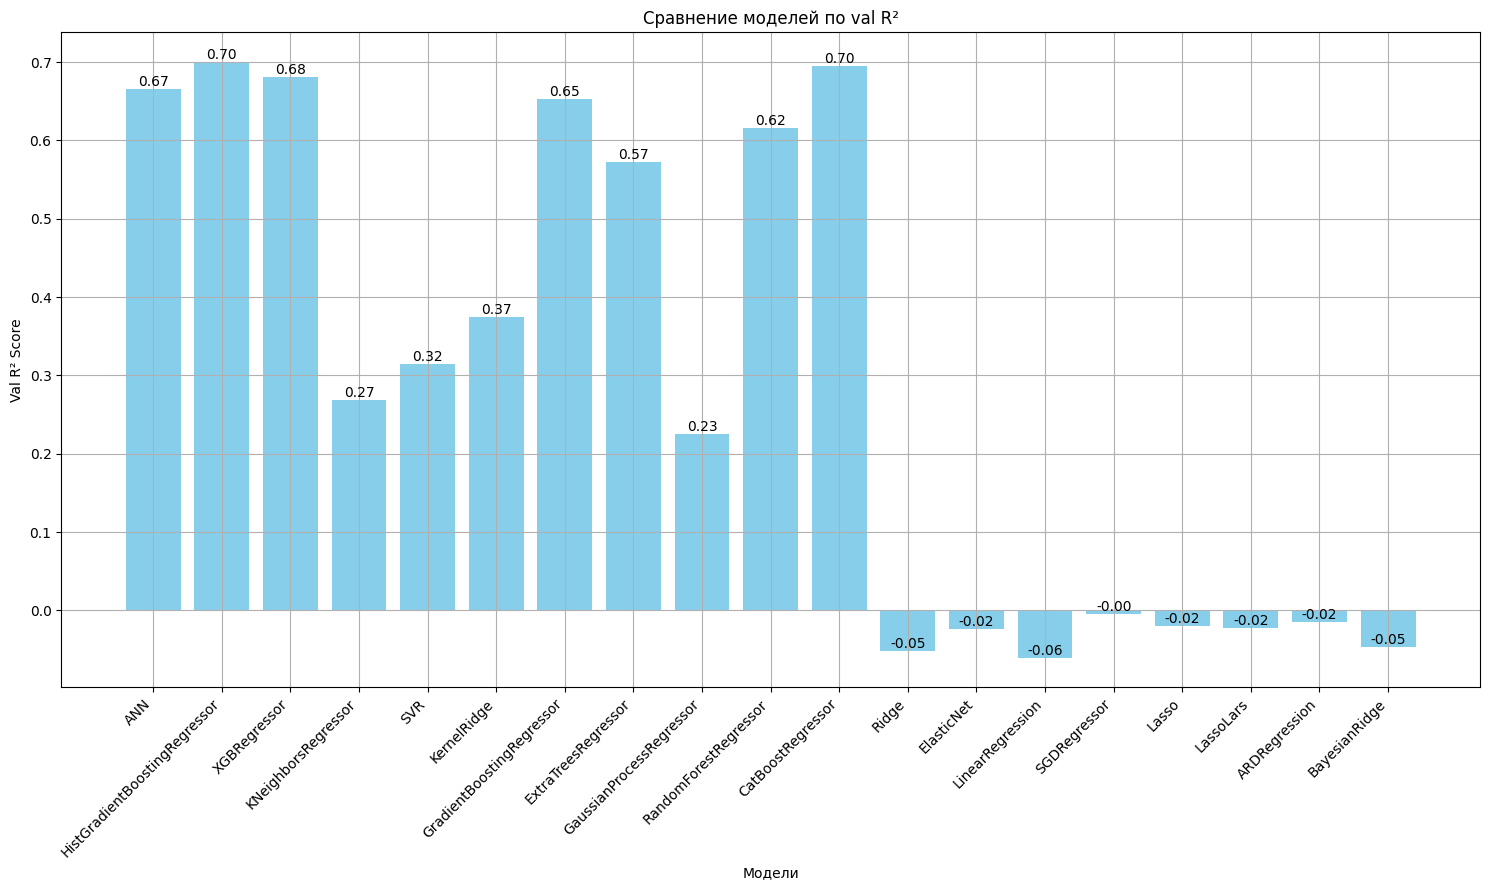

In [5]:
# Построить график валидационной оценки R2 для лучших моделей
plt.figure(figsize=(15, 9))

plt.grid()
bars = plt.bar(model_names, val_r2_scores, color='skyblue')
plt.title('Сравнение моделей по val R²')
plt.xlabel('Модели')
plt.ylabel('Val R² Score')
plt.xticks(rotation=45, ha='right')
for bar, score in zip(bars, val_r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{score:.2f}', ha='center', va='bottom')
plt.tight_layout()

In [6]:
# Выбрать модель для симуляции
scores = OS.best_models_r_val

r2_max = -99

for i, test_r2_score in enumerate(scores):
    if r2_max < test_r2_score:
        r2_max = test_r2_score
        ii = i

model_to_simulate = OS.best_models[ii]
print(type(model_to_simulate).__name__)
print(r2_max)

HistGradientBoostingRegressor
0.6999613610137052


In [ ]:
# Ручной выбор модели
model_to_simulate = OS.best_models[2]

In [ ]:
# Отобразить все результаты
df = pd.read_csv('../results/synth_results.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	display(df.sort_values(by=['R2_val'], ascending=False))

In [28]:
# Оптимизация над аппроксимируемой функцией
OS.optimize([OS.best_models[1]], scaler, direction='minimize', problem='synth', plot=True, verbose=True)

HistGradientBoostingRegressor found -2.227534306600931 with params {'x1': 69.3860592648804, 'x2': 51.929234787540565, 'x3': 75.13796738583126}


(-2.227534306600931,
 {'x1': 69.3860592648804, 'x2': 51.929234787540565, 'x3': 75.13796738583126})

In [21]:
# Симуляция эксперимента
def func(x):
	return np.sin(x.T[0])+np.sin(x.T[0]/2)+np.sin(x.T[0]/4)+np.cos(x.T[0]/8)+np.cos(x.T[0]/16)

min_y_row = full_df.loc[full_df['y'].idxmin()]
x_min = float(min_y_row[['x1']])
y_min = min_y_row['y']
tol = 0.5
n_trials = 1000
n_startup_trials = 10
max_iter = 20

accuracy_history, min_history, x_history, y_history,y_true_history = OS.simulate_experiment(func, model_to_simulate, scaler, x_train_scaled, y_train, x_min, y_min, tol, direction='minimize', n_trials=n_trials, n_startup_trials=n_startup_trials, max_iter=max_iter)

In [8]:
print(x_min)

73.31129560905445


In [22]:
x_np = np.array(x_history)[:,0]
print(x_np)

[23.83825974 21.94993255 23.14085151 23.12716682 22.99220188 22.5397722
 73.37171918]


In [23]:
for i, yi in enumerate(y_history):
	print(f'{i} {yi}')

0 -3.0332680182423433
1 -3.1115141174588
2 -2.88399587109306
3 -3.136821564029442
4 -3.1245092896078765
5 -3.215270632099327
6 -2.3992210541583763


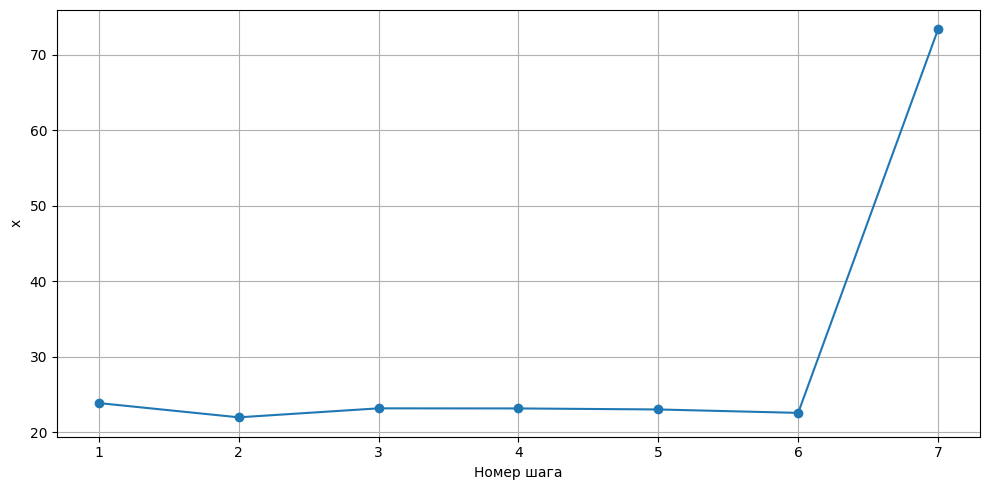

In [24]:
# Построить график вектора x от номера шага
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(x_np) + 1), x_np, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('x')
plt.grid(True)
plt.tight_layout()
plt.show()

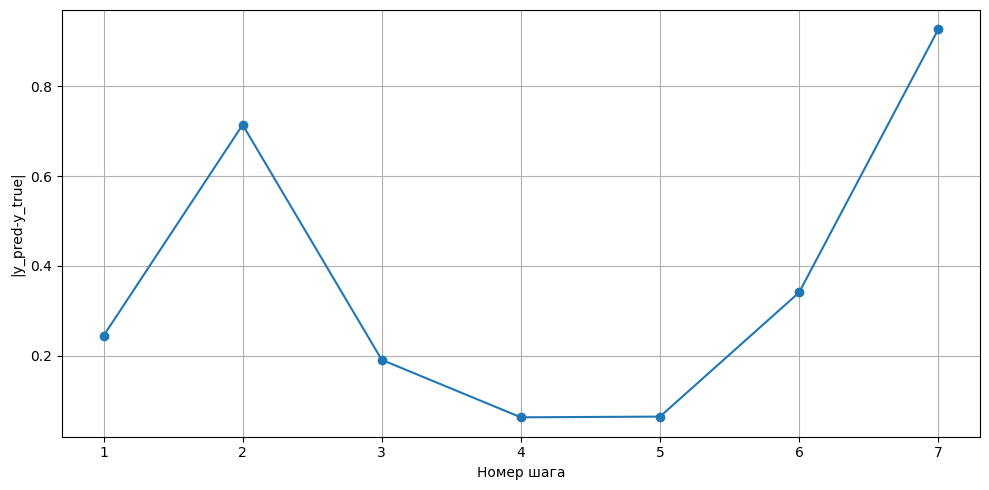

In [25]:
# Построить график |y_pred-y_true| от номера шага

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('|y_pred-y_true|')
plt.grid(True)
plt.tight_layout()
plt.show()

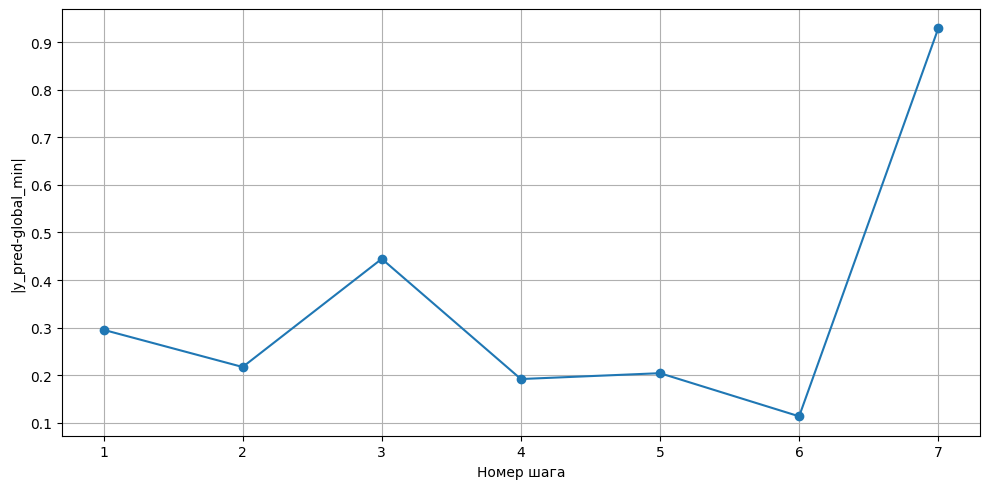

In [26]:
# Построить график |y_pred-global_min(y_true)| от номера шага
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(min_history) + 1), min_history, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('|y_pred-global_min|')
plt.grid(True)
plt.tight_layout()
plt.show()

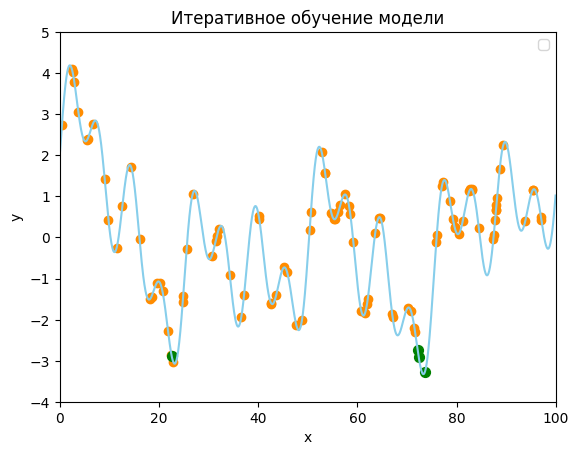

In [20]:
# Создать анимацию истории выбора точек
from copy import deepcopy
from matplotlib.animation import FuncAnimation

_x_train = deepcopy(x_train)
_y_train = deepcopy(y_train)

frames = []
frames.append((x_train, y_train))
l = len(x_train)

i=0
for x_new, y_new in zip(x_history, y_true_history):
    i+=1
    _x_train = np.vstack([_x_train, x_new])
    _y_train = np.append(_y_train, y_new)

    frames.append((_x_train, _y_train))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-')
plt.scatter(x_train.T[0], y_train, color='darkorange')
scatter_new = ax.scatter([], [], c='green', s=50)
ax.plot(x_full.T[0], y_full, c='skyblue')

def update(frame):
    global line
    X_tr, y_tr = frame
    npc = np.c_[X_tr[l:,0], y_tr[l:]]
    line = line
    scatter_new.set_offsets(npc)
    ax.set_xlim(0, 100)
    ax.set_ylim(-4, 5)
    return line, scatter_new

ani = FuncAnimation(fig, update, frames=frames, interval=500, blit=True)
ani.save("animated.gif", writer='pillow')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Итеративное обучение модели")
plt.show()